# Assignment 02

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

from Data import Data
from kNN import kNN

In [2]:
pd.options.display.precision = 2

The distance functions to be used in kNN.

In [3]:
def l2norm(p):
    return np.sqrt(np.sum(p ** 2))


def euclidean_dist(p1, p2):
    return l2norm(p1 - p2)


def cosine_dist(p1, p2):
    sim = np.dot(p1, p2) / (l2norm(p1) * l2norm(p2))
    return 1 - sim

Read the iris dataset and create a 50/50 split for dev/test data.
<br>
See [Data.py](Data.py)

In [4]:
data = Data('iris.data', 0.5)

Create models for the 3 distance measures:
- Euclidean
- Normalized Euclidean
- Cosine

See [kNN.py](kNN.py)

In [5]:
models = {
    'euclidean': kNN(data.dev, data.features, euclidean_dist, False),
    'normalized euclidean': kNN(data.dev, data.features, euclidean_dist, True),
    'cosine': kNN(data.dev, data.features, cosine_dist, False),
}

In [6]:
hyper_params = [1, 3, 5, 7]

Calculate the accuracy for each value of k in each model by testing development data against itself.

In [7]:
accuracy = pd.DataFrame(columns=models.keys(), index=hyper_params)
for mdl_name, mdl in models.items():
    for k in hyper_params:
        acc = mdl.k_accuracy(k)
        accuracy.at[k, mdl_name] = acc

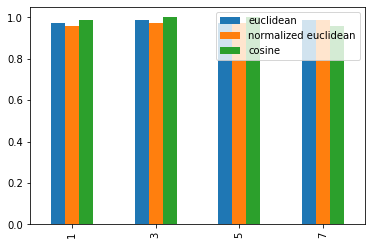

In [8]:
accuracy.plot.bar()

In [9]:
accuracy

euclidean normalized euclidean cosine
1      0.97                 0.96   0.99
3      0.99                 0.97      1
5      0.97                 0.97      1
7      0.99                 0.99   0.96

Calculate the final accuracy against test data.

In [10]:
final_accuracy = pd.DataFrame(columns=models.keys(), index=hyper_params)
for mdl_name, mdl in models.items():
    for k in hyper_params:
        acc = mdl.calc_accuracy(data.test, k)
        final_accuracy.at[k, mdl_name] = acc

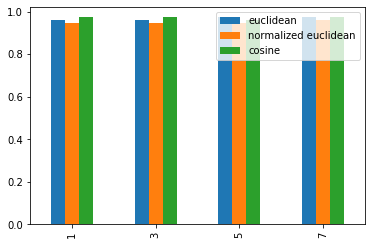

In [11]:
final_accuracy.plot.bar()

In [12]:
final_accuracy

euclidean normalized euclidean cosine
1      0.96                 0.95   0.97
3      0.96                 0.95   0.97
5      0.97                 0.95   0.96
7      0.97                 0.96   0.97

The data is insufficient to provide any conclusive results but
<br>
***cosine*** similarity/distance seems to be performing the best amongst these 3 models.